# Part 1) Load the data and make a datetime index.

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# URL CSV
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv')
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0


## Convert the date column to datetime dtype.



In [3]:
# convert dtype to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0


## Set the date column as the index.


In [4]:
df = df.set_index('date')
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Filter out only the required data:
- Keep only data from the year 2000 or later.
- Keep only the following features:
    - precipitation
    - mean_temp
    - min_temp
    - max_temp
    - snow_depth


In [5]:
# filter years 2000+ and keep requested columns
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 
                      'snow_depth']]

df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


## Impute any missing values.
    - Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

In [6]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [7]:
df.describe()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
count,7281.000000,7252.000000,7285.000000,7281.000000,5919.000000
mean,1.723376,11.907308,8.000480,15.810850,0.023146
std,3.675610,5.669191,5.242933,6.526161,0.306467
min,0.000000,-4.100000,-9.400000,-1.200000,0.000000
25%,0.000000,7.600000,4.100000,10.800000,0.000000
50%,0.000000,11.800000,8.200000,15.600000,0.000000
75%,1.800000,16.400000,12.100000,20.700000,0.000000
max,51.600000,29.000000,22.300000,37.900000,12.000000


In [8]:
# imputation for prec
df['precipitation'] = df['precipitation'].fillna(0)

In [9]:
# imputation for snow depth
df['snow_depth'] = df['snow_depth'].fillna(0)

In [10]:
# imputation for mean temp, using two values before and after
df['mean_temp'] = df['mean_temp'].interpolate()

In [11]:
# imputation for min temp, using two values before and after
df['min_temp'] = df['min_temp'].interpolate()

In [12]:
# imputation for max temp, using two values before and after
df['max_temp'] = df['max_temp'].interpolate()

In [13]:
# confirm imputations
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

-For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Plot the feature that the question is asking about.
    - If there is a specific time period, plot only that time period.

**Note: you may want to make a temporary DataFrame that you will use to answer this question only.**

## Q1: What month had the most precipitation between 2000 through 2010?



In [14]:
# dataframe with years and column
prec_df = df.loc['2000':'2010', ['precipitation']]
prec_df.head(2)

,precipitation
date,
2000-01-01,0.0
2000-01-02,0.2


### Resample the data as Monthly frequency.

In [15]:
# Resample the data as Monthly frequency. sum, of each month
mon_prec_res = prec_df.resample("M").sum()
mon_prec_res.name = 'Resampled'
mon_prec_res.head()


,precipitation
date,
2000-01-31,14.3
2000-02-29,62.2
2000-03-31,13.4
2000-04-30,71.8
2000-05-31,68.4


### Find the date and corresponding value for the max precipitation

In [16]:
# Find the date max precipitation
max_date = mon_prec_res['precipitation'].idxmax()
max_date

Timestamp('2009-11-30 00:00:00', freq='M')

In [17]:
# Find the value for the max precipitation
precipitation = mon_prec_res['precipitation'].loc[max_date]
precipitation

138.4

In [18]:
# Statement for the max precipitation.

print(f"The date with the most precipitation was {max_date.strftime('%m/%d/%Y')}, which was a {precipitation} inches.")

The date with the most precipitation was 11/30/2009, which was a 138.4 inches.


## Q1 Visualization Requirements
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
        - With the title "Precipitation for 2000-2010"
        - With a ylabel of "Inches"
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 1 year.
        - Use 4-digit years for the labels
        - Rotate the major ticks' labels 90 degrees.
    - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 3 months
        - Do not label the minor ticks.

In [20]:
# Plot formats
label = f'{max_date.strftime("%m/%d/%Y")} with {precipitation} inches'

loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")

loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

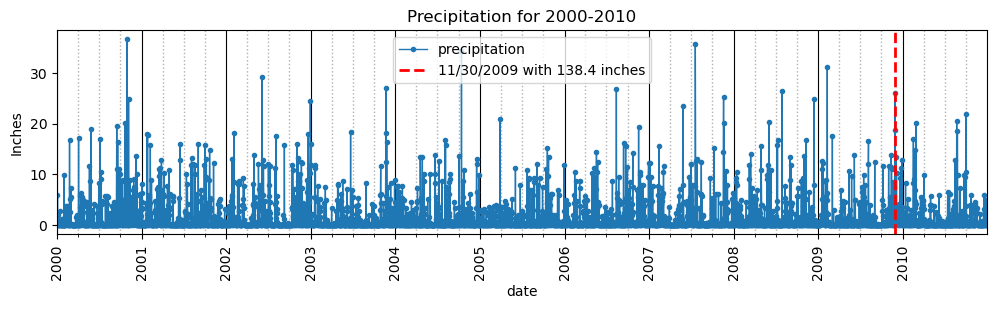

In [21]:
#Create a wide figure (e.g. figsize=(12,3))
fig, ax = plt.subplots(figsize=(12,3))

#With the title "Precipitation for 2000-2010"
prec_df.plot(ax=ax,title='Precipitation for 2000-2010',marker='.',lw=1)

#ylabel of "Inches"
plt.ylabel('Inches')

##Customize the major xaxis ticks to:

#Have major xaxis ticks every 1 year.
ax.xaxis.set_major_locator(loc_year)

#Use 4-digit years for the labels
ax.xaxis.set_major_formatter(fmt_year)

#Rotate the major ticks' labels 90 degrees.
fig.autofmt_xdate(rotation=90,ha='center')

## Customize the minor xaxis ticks to:

#Have minor xaxis ticks every 3 months
ax.xaxis.set_minor_locator(loc_3months)

#Do not label the minor ticks.
ax.grid(which='minor',axis='x',ls=":",lw=1)
ax.grid(which='major',axis='x',color='k')
# Add a vertical line at this date with a label that says the date 
    #(using date format: "April 2000") and the max precipitation value.
ax.axvline(max_date, color='red',lw=2, ls='--', label= label)
ax.legend();

## Q2: Which year between 2000-2020 had the coolest average temperature?


In [22]:
# dataframe with years and column
temp_df = df.loc['2000':'2020', ['mean_temp']]
temp_df.head(2)

,mean_temp
date,
2000-01-01,7.0
2000-01-02,7.9


## Resample the data as Yearly frequency.

In [24]:
# Resample the data as Yearly frequency, for average
ts_Y_res = temp_df.resample("A").sum()
ts_Y_res.name = 'Resampled'
ts_Y_res.head()


,mean_temp
date,
2000-12-31,4236.70
2001-12-31,4136.00
2002-12-31,4410.75
2003-12-31,4421.80
2004-12-31,4355.65


## Determine the date and value for the lowest mean temp.

In [25]:
# Find the date min mean temp
min_date = ts_Y_res['mean_temp'].idxmin()
min_date

Timestamp('2010-12-31 00:00:00', freq='A-DEC')

In [26]:
# Find the value for the min mean temp
low_temp = ts_Y_res['mean_temp'].loc[min_date]
low_temp

3889.95

In [27]:
# Statement for the min mean temp.

print(f"The date with the lowest average temp was {min_date.strftime('%m/%d/%Y')}, where it was {low_temp}.")

The date with the lowest average temp was 12/31/2010, where it was 3889.95.


## Q2 Visualization Requirements
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
        - With the title "Average Temperature"
        - With a ylabel of "Degrees"
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 5 years.
        - Use 4-digit years for the labels
        - Rotate the major ticks' labels 90 degrees.
    - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 1 year
        - Do not label the minor ticks.

In [28]:
# Plot formats
label = f'{min_date.strftime("%m/%d/%Y")} at {low_temp} degrees'
# minor
loc_1year = mdates.YearLocator()
# major
loc_5year = mdates.YearLocator(5)
fmt_year = mdates.DateFormatter("%Y")

''

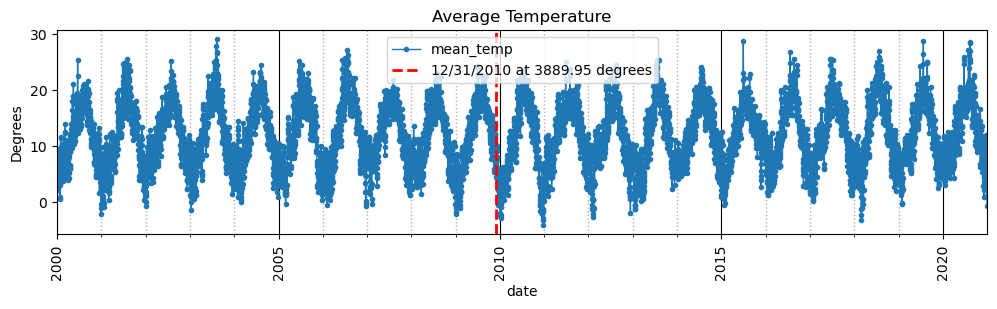

In [29]:
#Create a wide figure (e.g. figsize=(12,3))
fig, ax = plt.subplots(figsize=(12,3))

#With the title "Average Temperature"
temp_df.plot(ax=ax,title='Average Temperature',marker='.',lw=1)
#ylabel of "Inches"
plt.ylabel('Degrees')

##Customize the major xaxis ticks to:
#Have major xaxis ticks every 5 years.
ax.xaxis.set_major_locator(loc_5year)

#Use 4-digit years for the labels
ax.xaxis.set_major_formatter(fmt_year)

#Rotate the major ticks' labels 90 degrees.
fig.autofmt_xdate(rotation=90,ha='center')

## Customize the minor xaxis ticks to:
#Have minor xaxis ticks every 1 year
ax.xaxis.set_minor_locator(loc_1year)

#Do not label the minor ticks.
ax.grid(which='minor',axis='x',ls=":",lw=1)
ax.grid(which='major',axis='x',color='k')

# Add a vertical line at this date with a label that says the date 
    ##(using date format: "2000") and the lowest mean temperature value
ax.axvline(max_date, color='red',lw=2, ls='--', label= label)
ax.legend(loc='upper center');
;

- Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!

- Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value